In [55]:
from imp import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

from lib import IO
from lib import Loader
from lib import graph
from lib import pt_utils

plt.rcParams['figure.dpi'] = 100

reload(Loader)
reload(graph)
reload(IO)
la = Loader.LALoader()
bjh = Loader.BJLoader('highway')
bjm = Loader.BJLoader('metro')

In [76]:
np.digitize?

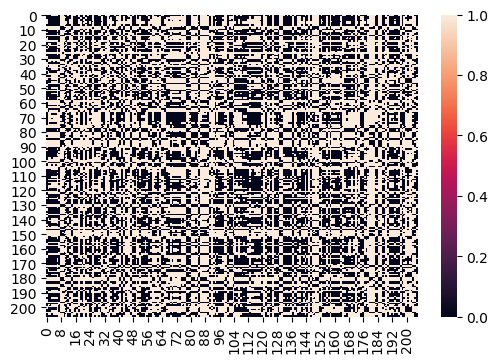

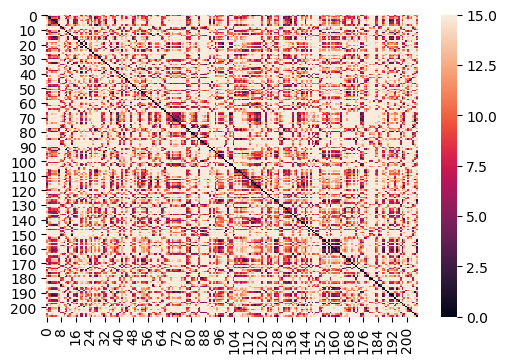

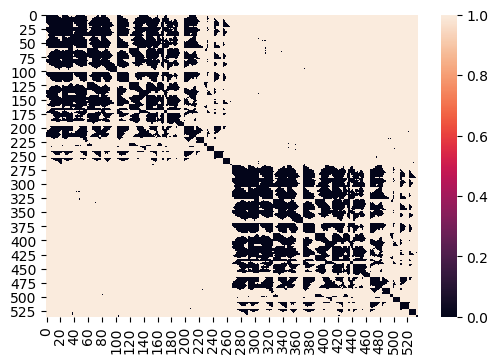

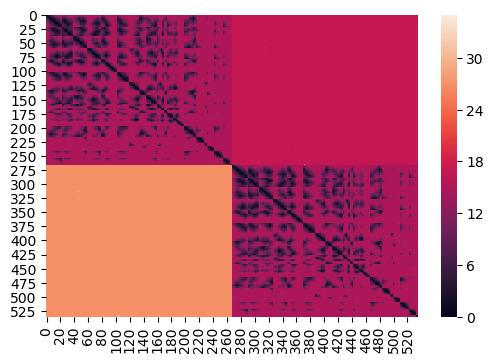

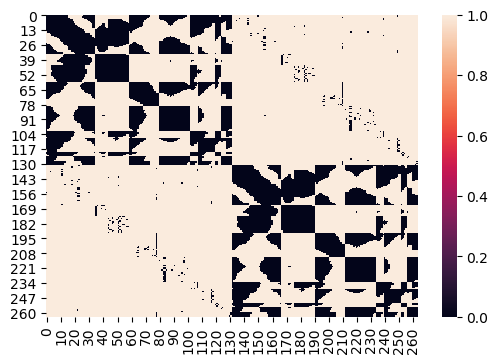

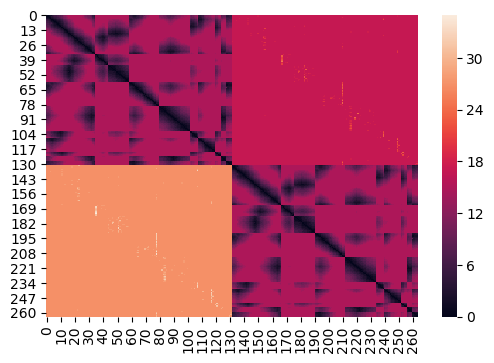

In [79]:
reload(pt_utils)
reload(graph)
for dataset in ['LA', 'BJ_metro', 'BJ_highway']:
    adj, mask = pt_utils.load_adj_long(dataset)
    sns.heatmap(mask)
    plt.show()
    sns.heatmap(adj)
    plt.show()

0.449905482042
(16,)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


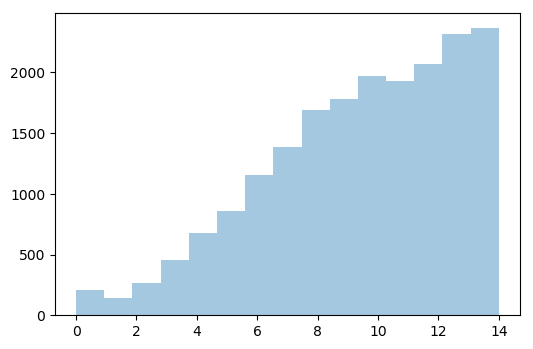

0.456496786042
(16,)


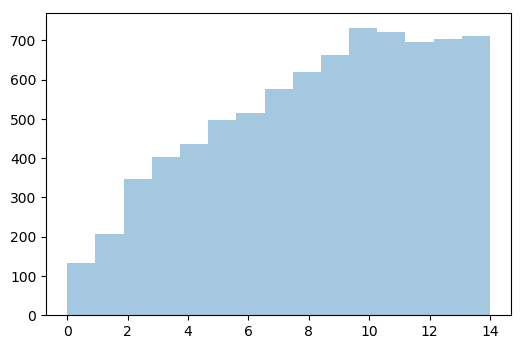

0.457242704389
(16,)


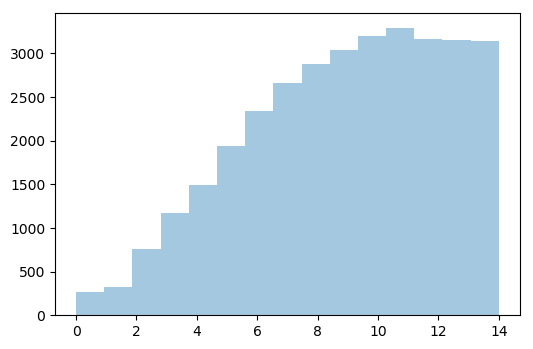

In [45]:
reload(graph)
for loader in [la, bjh, bjm]:
    num = 16
    dist = loader.load_dist()
    dist = graph.dist_to_long(dist.values, num)
    values = dist.reshape(-1)
    index = values < max(values)
    print(sum(index) / len(index))
    print(np.unique(values).shape)
    sns.distplot(values[index], bins=num-1, kde=False)
    plt.show()

D:\Projects\ST_Attention\lib\graph.py:79: RuntimeWarning: invalid value encountered in true_divide
  do_ = od.transpose() / od.sum(1)
D:\Projects\ST_Attention\lib\graph.py:80: RuntimeWarning: invalid value encountered in true_divide
  return od_, do_
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.0145202020202


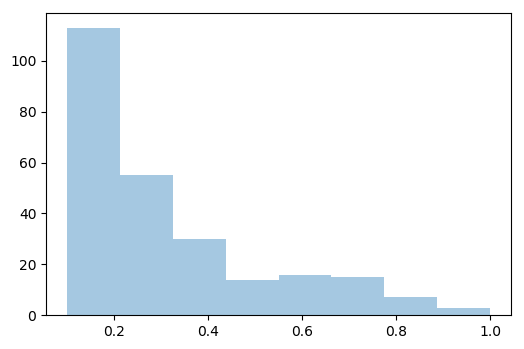

0.000153152149699


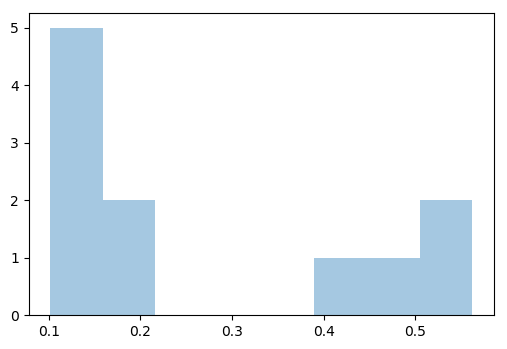

In [54]:
reload(graph)
for loader in [bjh, bjm]:
    od = loader.load_od()
    od, do = graph.calculate_od_adj(od)
    values = od.reshape(-1)
    index = values > 0.1
    print(sum(index) / len(index))
    sns.distplot(values[index], bins=8, kde=False)
    plt.show()

In [2]:
MODEL_PATH = 'data/models/LA/GARNNGRUHead4Hid64Lay2NodeTimeDay5min'
targets, outputs = [], []
for i in range(7):
    targets.append(np.load(MODEL_PATH + '_target_' + str(i)))
    outputs.append(np.load(MODEL_PATH + '_output_' + str(i)))
targets = np.concatenate(targets)
outputs = np.concatenate(outputs)
print(targets.shape, outputs.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'data/models/LA/GARNNGRUHead4Hid64Lay2NodeTimeDay5min_target_0'

(1855, 12, 207) (1855, 12, 207)


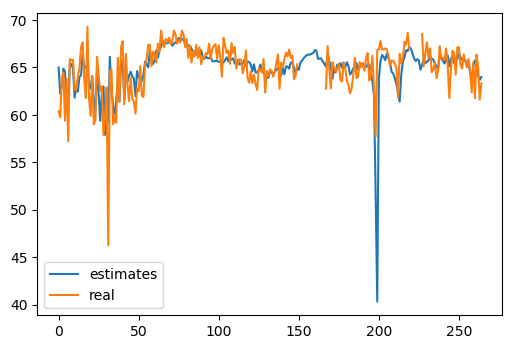

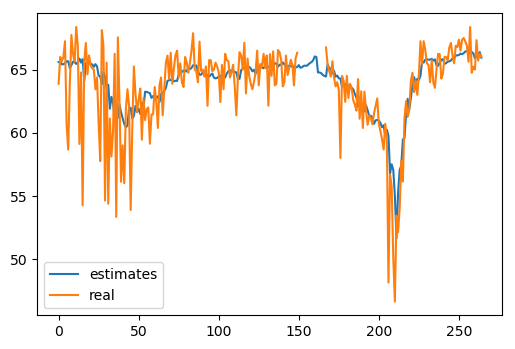

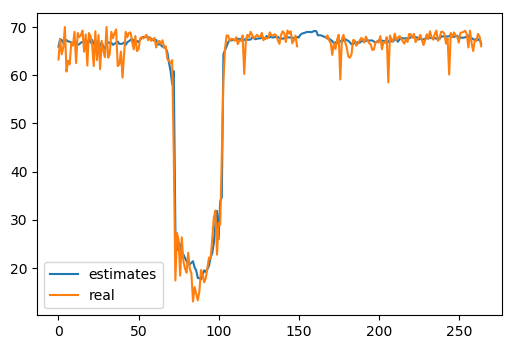

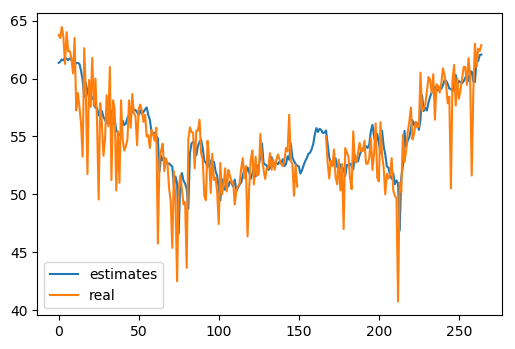

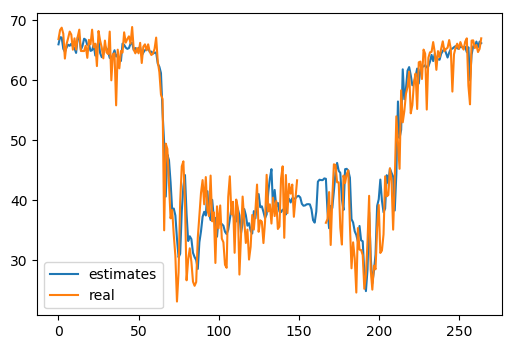

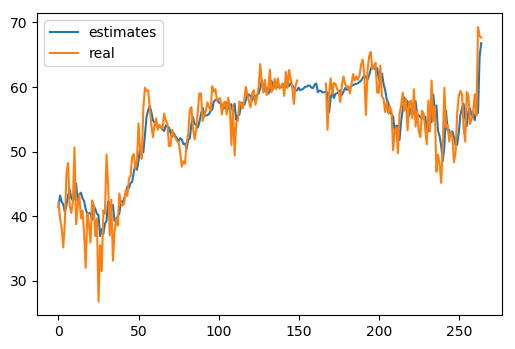

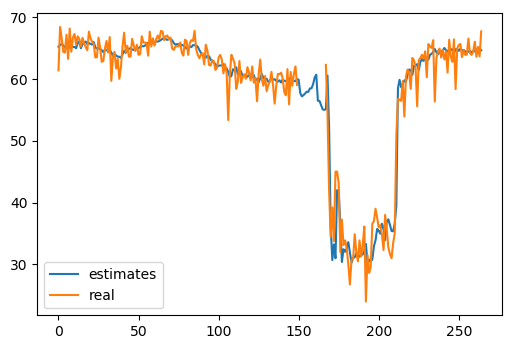

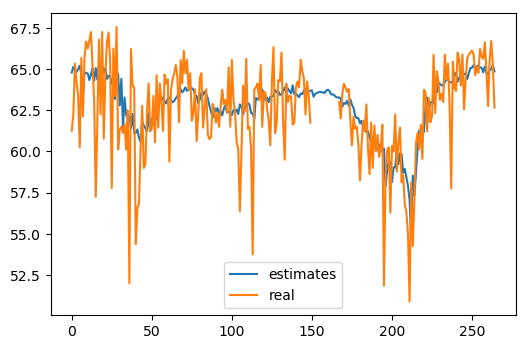

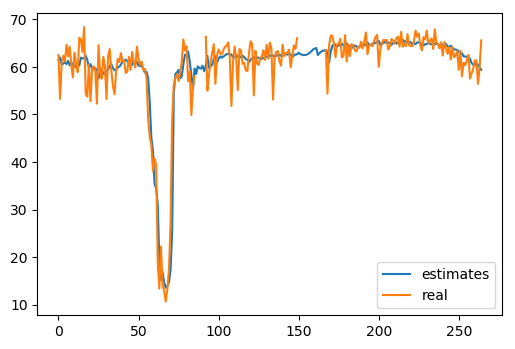

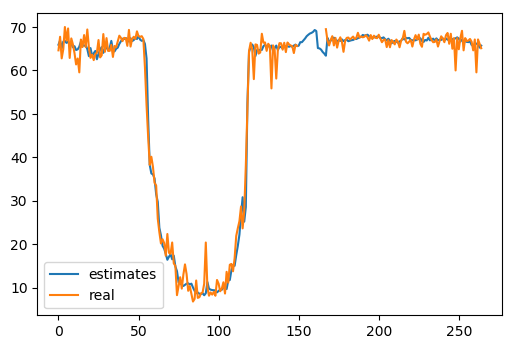

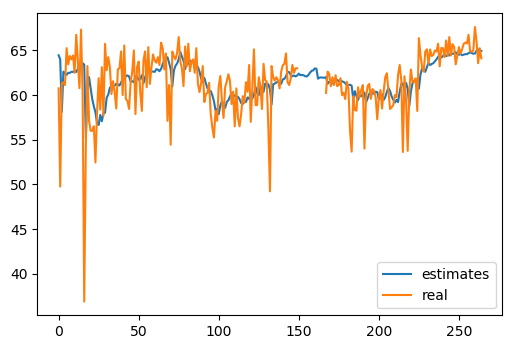

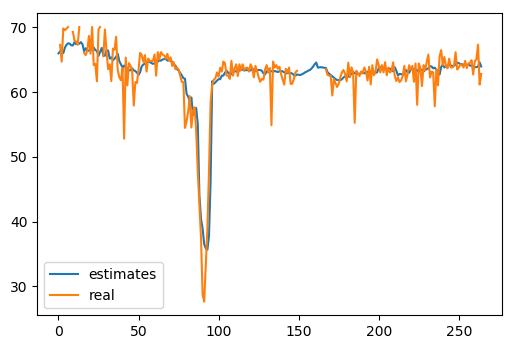

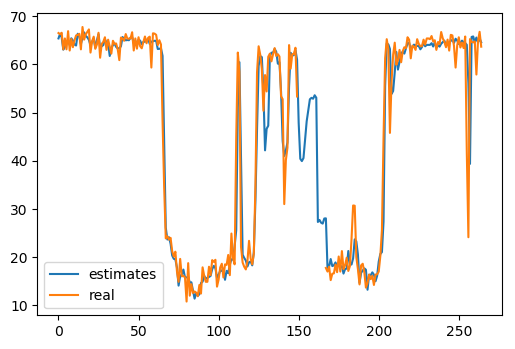

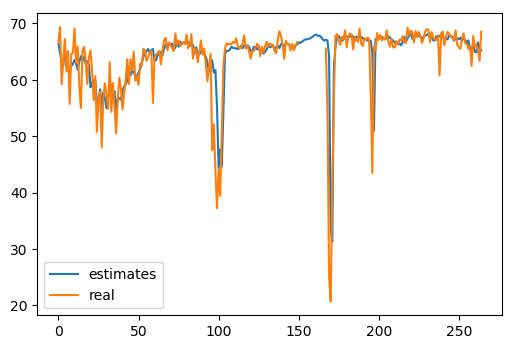

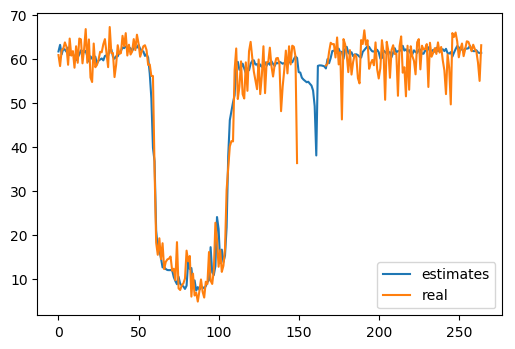

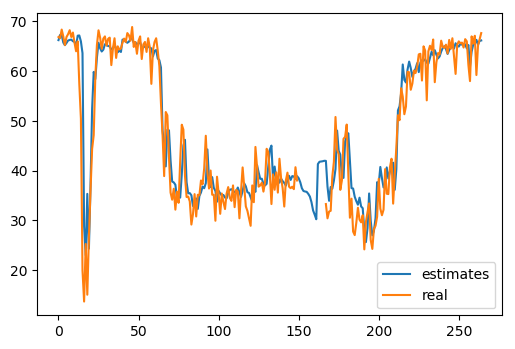

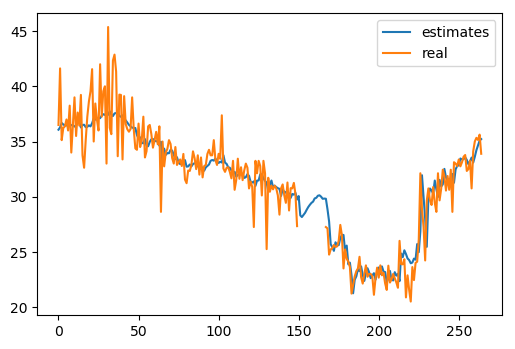

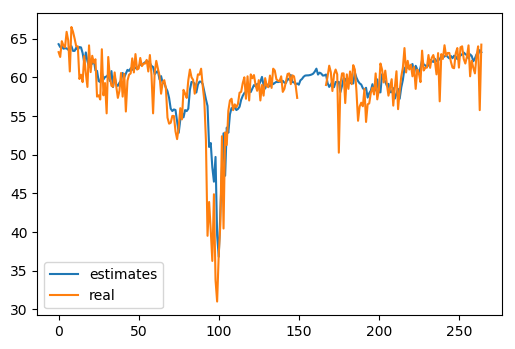

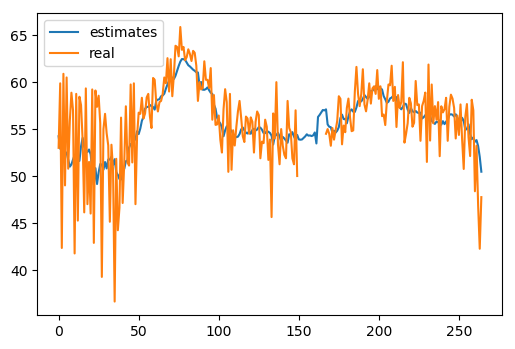

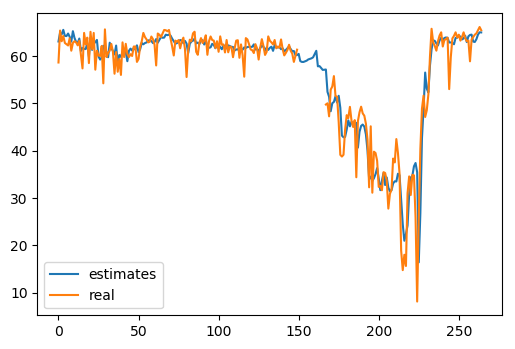

In [29]:
day_size = 1855 // 7
output = outputs[:day_size, 0]
target = targets[:day_size, 0]
print(outputs.shape, targets.shape)
for i in range(20):
    output_i = output[:, i]
    target_i = target[:, i]
    plt.plot(output_i, label='estimates')
    plt.plot(target_i, label='real')
    plt.legend()
    plt.show()
    

In [2]:
ts_la = la.load_ts()
ts_bjh = bjh.load_ts()
ts_bjm = bjm.load_ts()

C:\Users\shawnwan47\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


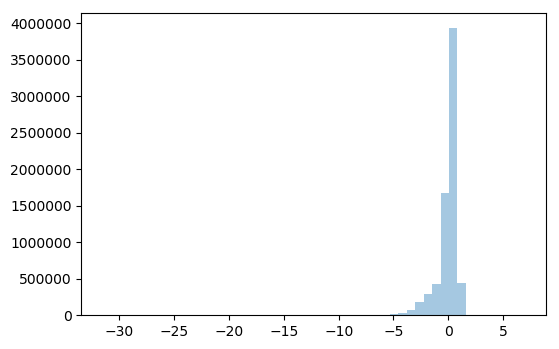

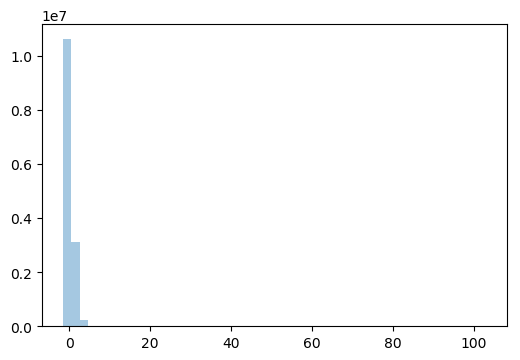

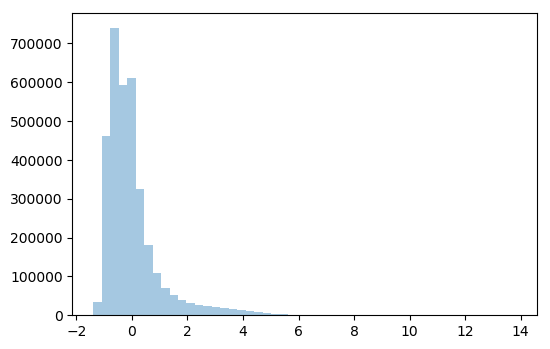

In [4]:
def scale(ts):
    return (ts - ts.mean()) / (ts.std() + 1e-8)

for ts in [ts_la, ts_bjh, ts_bjm]:
    plt.figure()
    values = scale(ts).values.reshape(-1)
    values = np.nan_to_num(values)
    sns.distplot(values, kde=False)
    plt.show()

C:\Users\shawnwan47\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


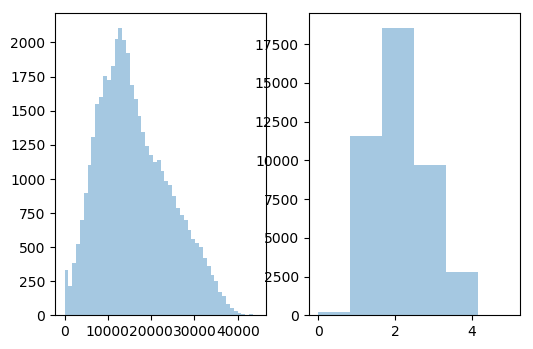

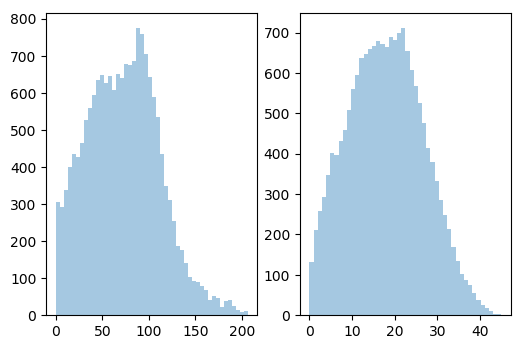

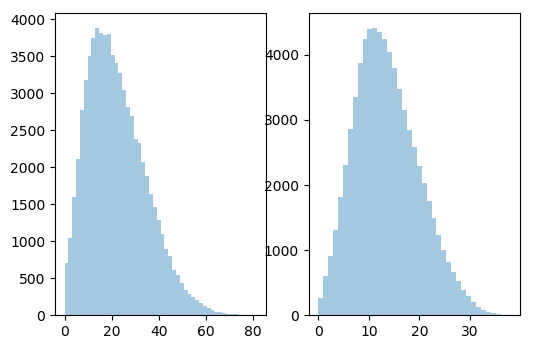

In [9]:
def show_dist_hop(dist, hop):
    plt.figure()
    plt.subplot(121)
    sns.distplot(dist.values.reshape(-1), kde=False)
    plt.subplot(122)
    sns.distplot(hop.values.reshape(-1), kde=False, bins=hop.max().max() + 1)

for loader in [la, bjh, bjm]:
    dist = loader.load_dist()
    hop = loader.load_hop()
    show_dist_hop(dist, hop)
    
plt.show()


In [ ]:
attention = np.load('./data/models/LA/GRARNNGRUHid64Lay2NodeTimeDay5min.pkl')

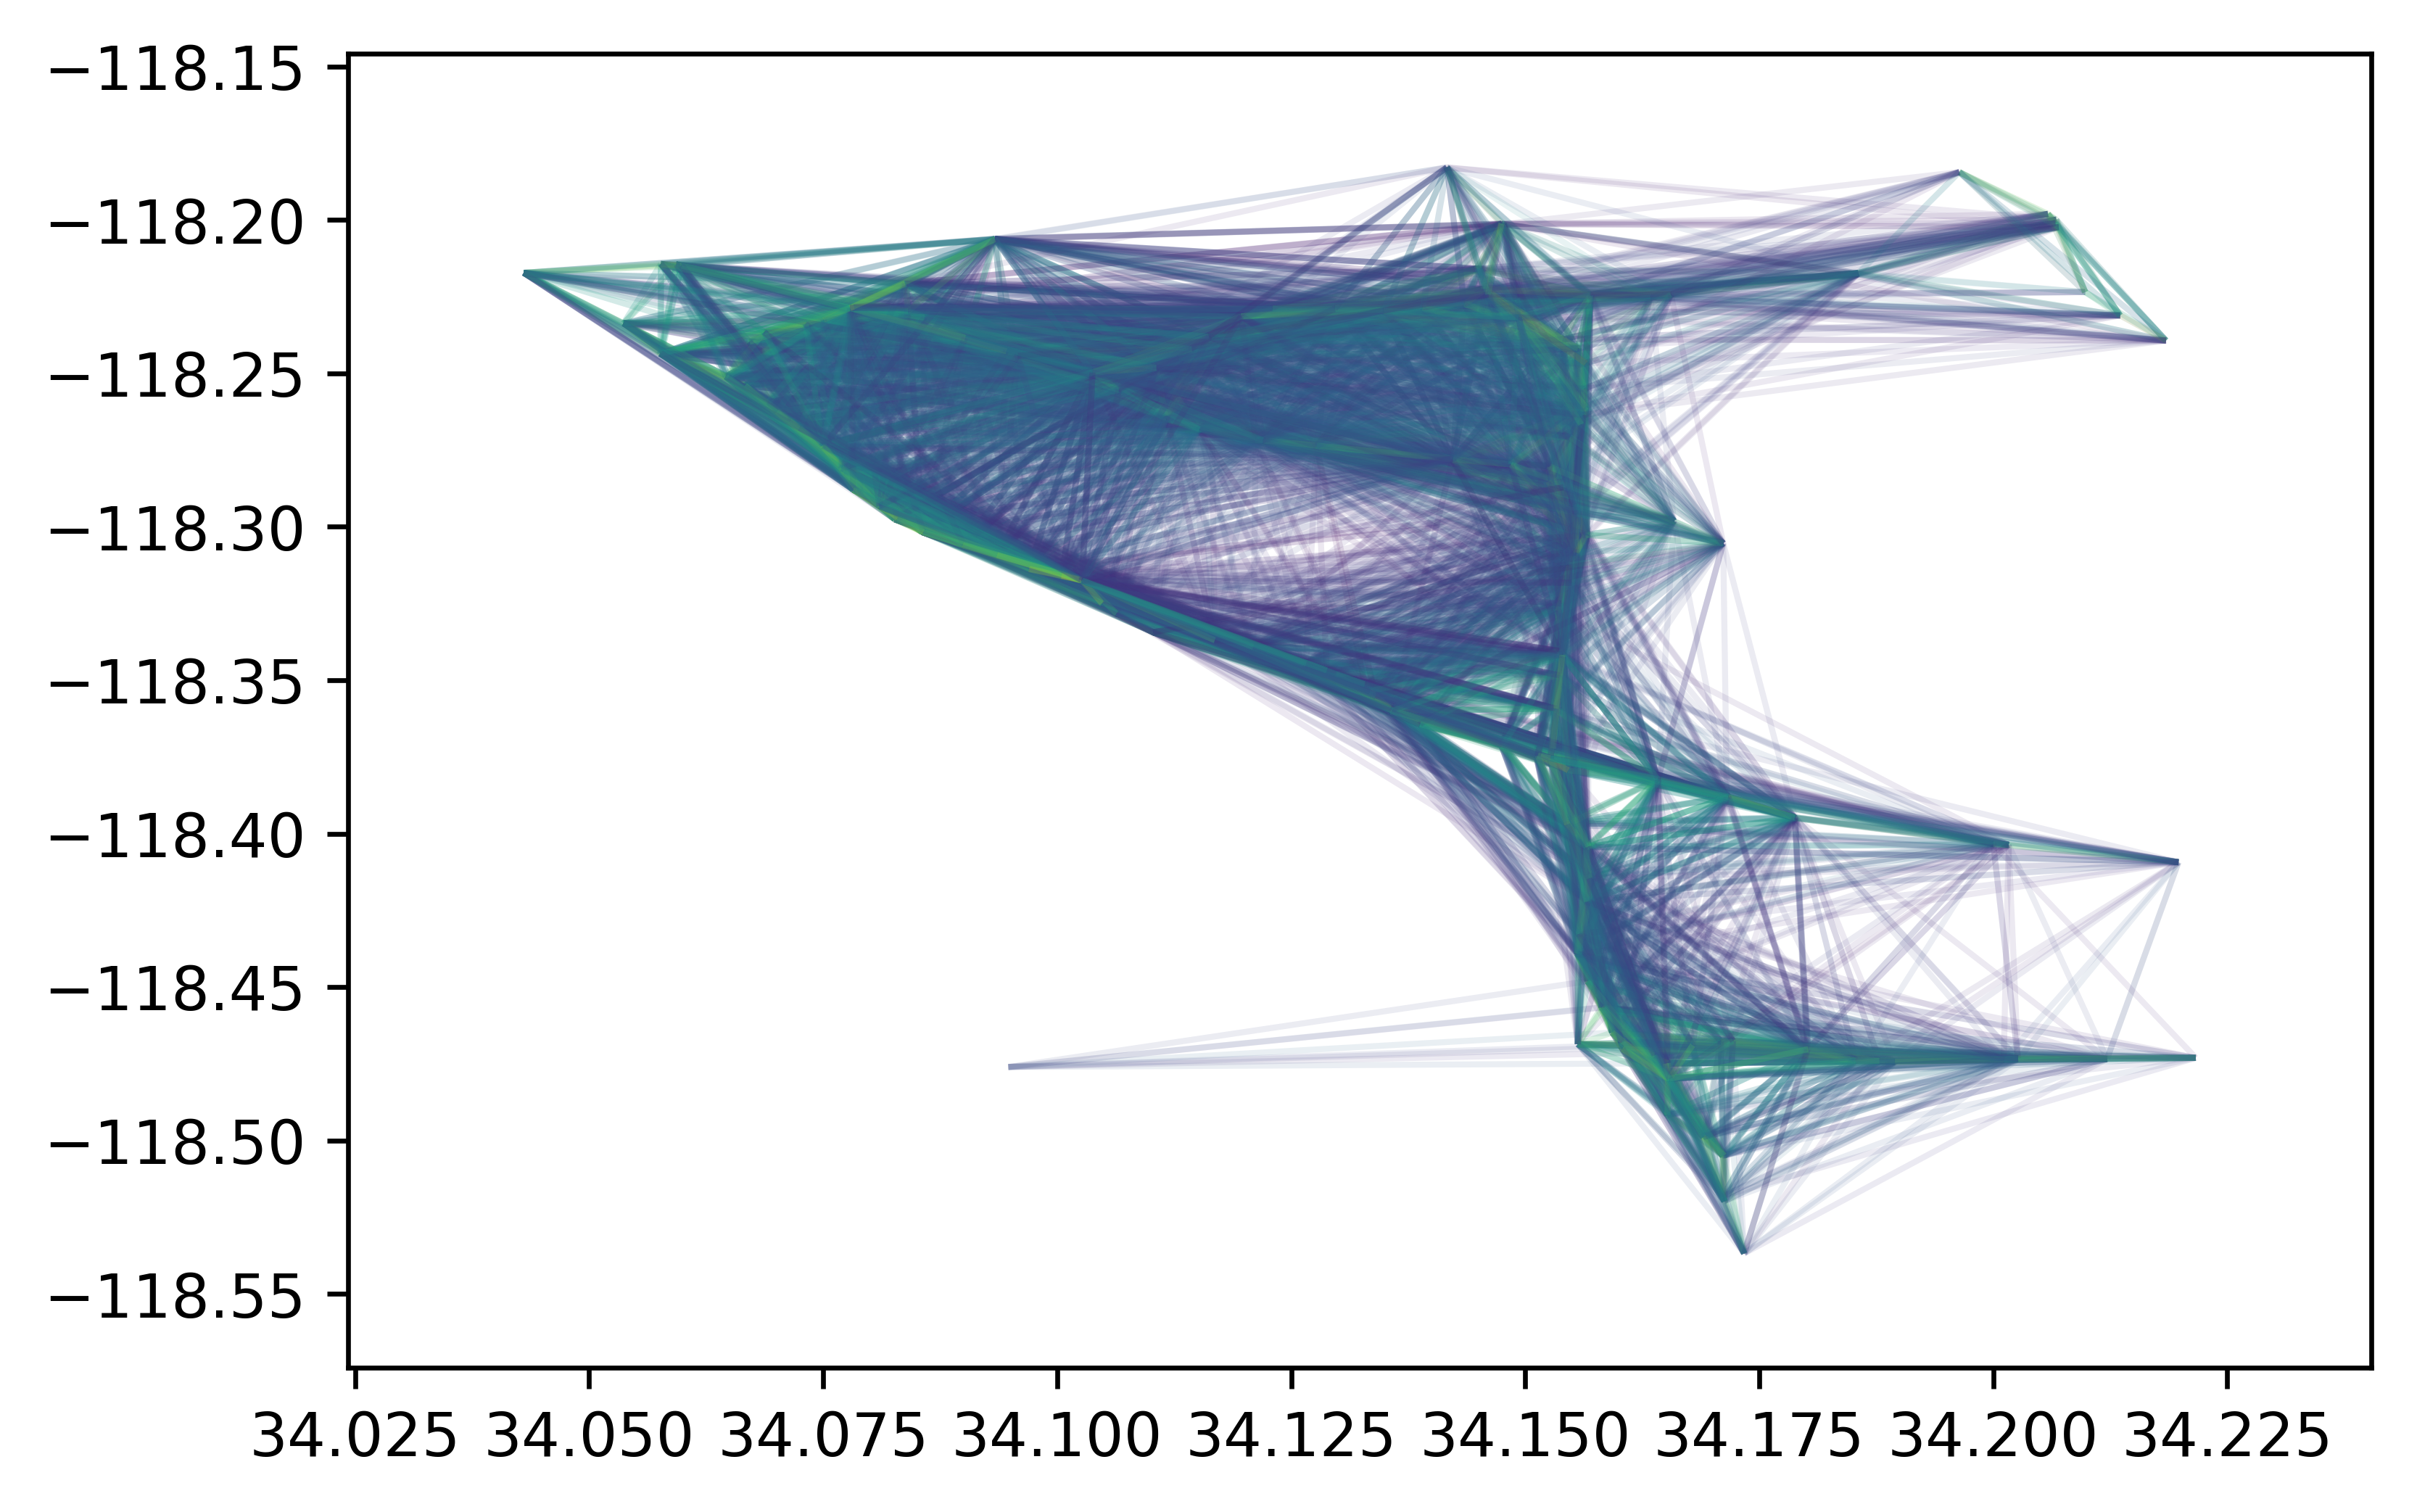

In [46]:
nx.draw_networkx_edges(G, pos=G.pos, edge_color=alphas, width=1, alpha=0.1, arrows=False)
plt.show()